In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(8,5)})

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
single = pd.read_csv("../data/single.main.tsv", sep='\t')

In [3]:
single

,#Dataset,Protein,Pos.A,AA1.A,AA2.A,Score.A
0,maveDB_15,SPG1_STRSG,229,Y,A,-0.788
1,maveDB_15,SPG1_STRSG,229,Y,C,-0.699
2,maveDB_15,SPG1_STRSG,229,Y,D,-6.644
3,maveDB_15,SPG1_STRSG,229,Y,E,-6.796
4,maveDB_15,SPG1_STRSG,229,Y,F,0.076
...,...,...,...,...,...,...
8515,maveDB_2,UBC9_HUMAN,114,L,T,-0.238
8516,maveDB_2,UBC9_HUMAN,60,L,R,-3.164
8517,maveDB_2,UBC9_HUMAN,127,D,R,-7.258
8518,maveDB_2,UBC9_HUMAN,71,S,A,0.324


In [4]:
single = single.rename(columns={'#Dataset': 'Dataset'})

In [5]:
mask_6 = (single['Protein'] == 'BRCA1_HUMAN') & (single['Dataset'] == 'maveDB_6')
mask_8 = (single['Protein'] == 'BRCA1_HUMAN') & (single['Dataset'] == 'maveDB_8')

In [6]:
mask_6.sum(), mask_8.sum()

(1748, 2523)

In [7]:
single.loc[mask_6, 'Protein'] = 'BRCA1_HUMAN_1'
single.loc[mask_8, 'Protein'] = 'BRCA1_HUMAN_2'

In [8]:
single.Protein.unique()

array(['SPG1_STRSG', 'UBE4B_MOUSE', 'PABP_YEAST', 'YAP1_HUMAN',
       'BRCA1_HUMAN_2', 'BRCA1_HUMAN_1', 'UBC9_HUMAN'], dtype=object)

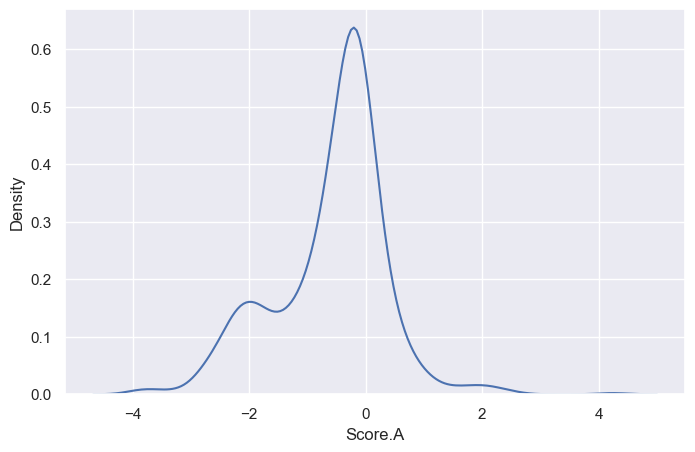

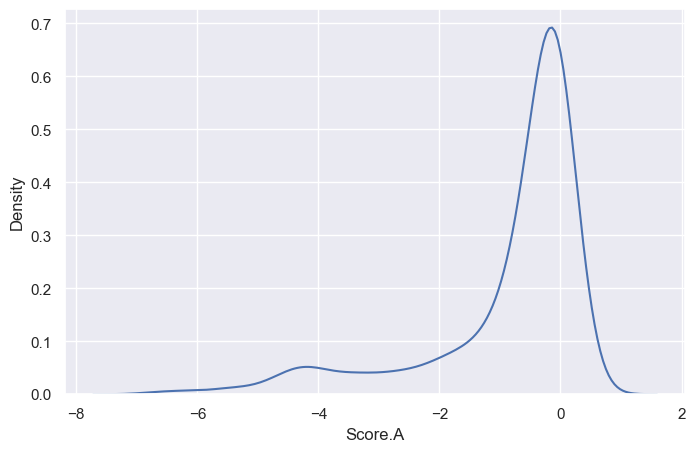

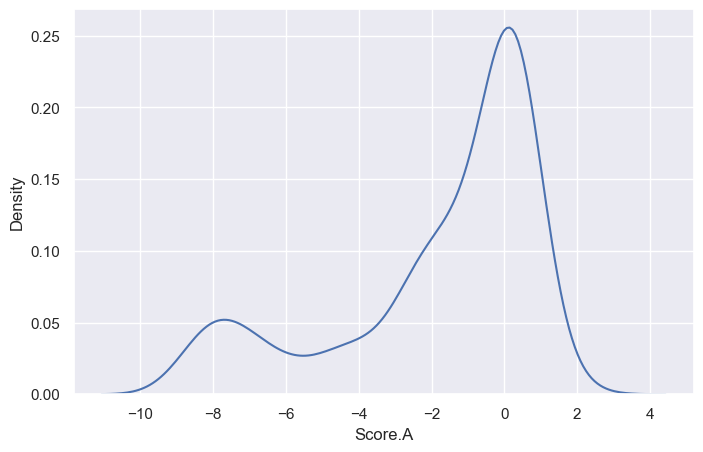

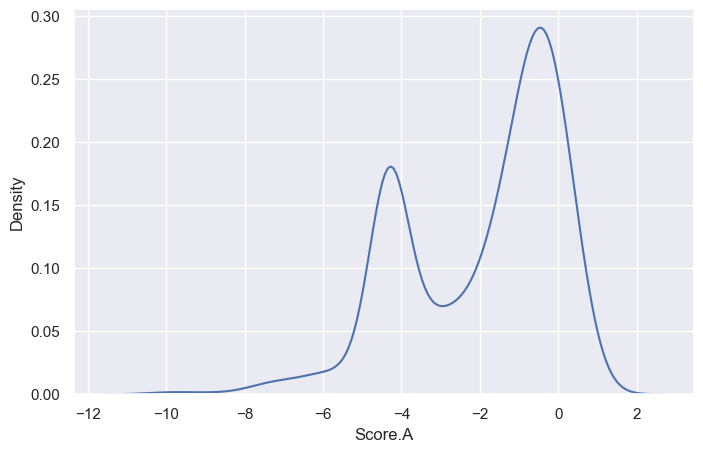

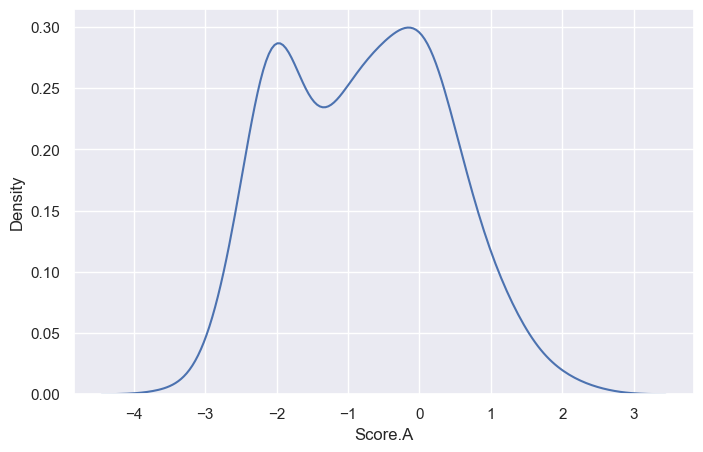

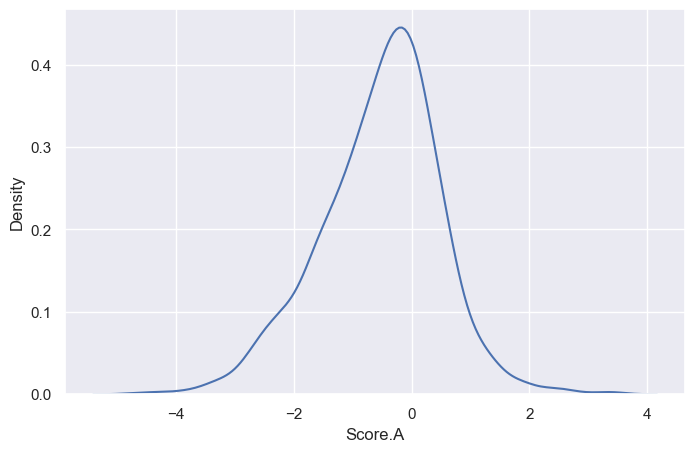

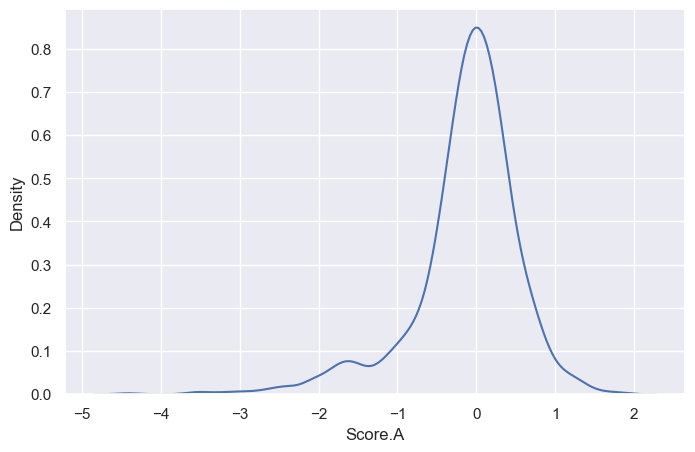

In [9]:
for i, (name, group) in enumerate(single.groupby('Dataset')):
    plt.figure(i)
    sns.kdeplot(group['Score.A'])

In [11]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

/var/folders/q4/tv8rtttx0l5dyw3jknz0v_g00000gn/T/ipykernel_3210/1479493715.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontsize=11, fontweight='normal')


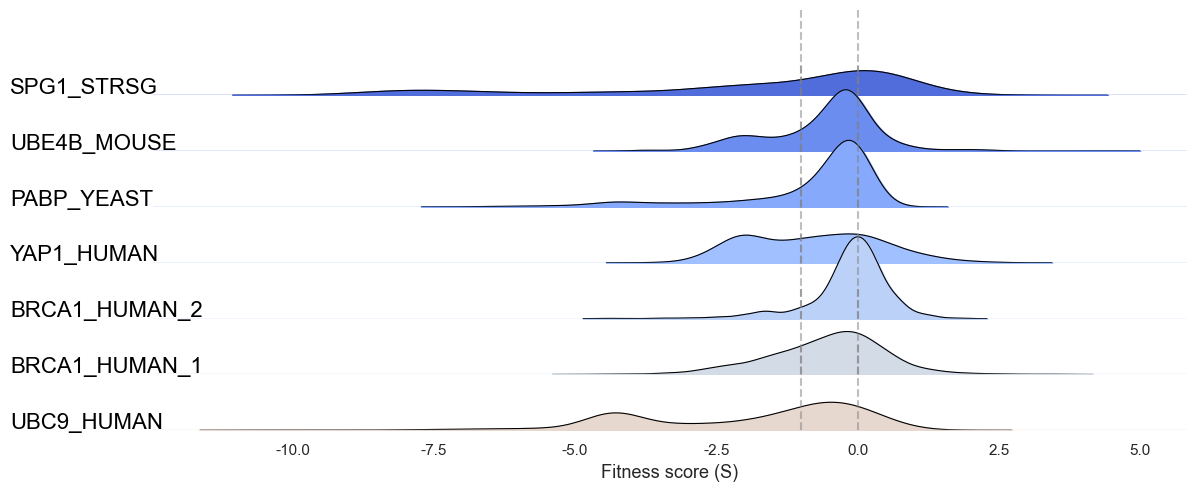

In [12]:
palette = sns.color_palette('coolwarm', n_colors=12)
g = sns.FacetGrid(single, row='Protein', hue='Protein', aspect=15, height=0.75, palette=palette)
g.map_dataframe(sns.kdeplot, x='Score.A', fill=True, alpha=1, linewidth=1.5)
g.map_dataframe(sns.kdeplot, x='Score.A', color="black", lw=0.8)
g.map(plt.axhline, y=0, lw=1, clip_on=True)
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.02, single.Protein.unique()[i], fontweight='ultralight', fontsize=16, color='black')
    ax.set_axisbelow(True)
    ax.axvline(x=-1., linestyle='dashed', color='grey', alpha=0.5)
    ax.axvline(x=0, linestyle='dashed', color='grey', alpha=0.5)

g.fig.subplots_adjust(hspace=-0.35)
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

ax = g.axes[-1, 0]
ax.set_xticklabels(ax.get_xticks(), fontsize=11, fontweight='normal')
plt.xlabel('Fitness score (S)', fontweight='normal', fontsize=13)
ax.set_axisbelow(True)

plt.show()